In [41]:
import pandas as pd
import os
import numpy as np
import networkx as nx 
from pyvis.network import Network

In [42]:
# read data
df_cate = pd.read_csv('./data/wikispeedia_paths-and-graph/categories.tsv', sep='\t', header=None, comment='#')
df_cate.head(5)

,0,1
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists


In [43]:
novel_name = df_cate[df_cate[1]=='subject.Language_and_literature.Novels'][0]

In [44]:
print(pd.unique(novel_name))

['A_Christmas_Carol' 'A_Tale_of_a_Tub' 'A_Wrinkle_in_Time'
 'Alice%27s_Adventures_in_Wonderland' 'Anna_Karenina' 'Charlotte%27s_Web'
 'Crime_and_Punishment' 'David_Copperfield_%28novel%29' 'Frankenstein'
 'Harry_Potter' 'Howards_End' 'Jane_Eyre' 'Kidnapped_%28novel%29'
 'Little_Women' 'Nineteen_Eighty-Four' 'Oliver_Twist'
 'One_Flew_Over_the_Cuckoo%27s_Nest_%28novel%29' 'Oroonoko'
 'Pride_and_Prejudice' 'Private_Peaceful' 'Robinson_Crusoe'
 'Starship_Troopers' 'The_Brothers_Karamazov' 'The_Catcher_in_the_Rye'
 'The_Count_of_Monte_Cristo'
 'The_Curious_Incident_of_the_Dog_in_the_Night-time'
 'The_Hitchhiker%27s_Guide_to_the_Galaxy' 'The_Hobbit'
 'The_Lion%2C_the_Witch_and_the_Wardrobe' 'The_Lorax'
 'The_Lord_of_the_Rings' 'The_Old_Man_and_the_Sea' 'The_Oz_books'
 'The_Picture_of_Dorian_Gray' 'The_Pilgrim%27s_Progress'
 'To_Kill_a_Mockingbird' 'Treasure_Island' 'War_and_Peace' 'Wolf_Brother']


In [45]:
#conda install -c conda-forge graph-tool
#conda install -c conda-forge rdflib

In [46]:
df_finished_path = pd.read_csv('./data/wikispeedia_paths-and-graph/paths_finished2.tsv', sep='\t')
df_finished_path.head(5)


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [47]:
df_finished_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51318 entries, 0 to 51317
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hashedIpAddress  51315 non-null  object 
 1   timestamp        51318 non-null  int64  
 2   durationInSec    51318 non-null  int64  
 3   path             51318 non-null  object 
 4   rating           28501 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ MB


In [48]:
# delete paths contain "back/<"
df_finished_path = df_finished_path[df_finished_path["path"].str.contains("<")==False]
df_contain_hp = df_finished_path[df_finished_path["path"].str.contains("Harry_Potter")==True]
df_contain_hp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 3427 to 51039
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hashedIpAddress  142 non-null    object 
 1   timestamp        142 non-null    int64  
 2   durationInSec    142 non-null    int64  
 3   path             142 non-null    object 
 4   rating           73 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.7+ KB


In [49]:
df_contain_tlotr = df_finished_path[df_finished_path["path"].str.contains("The_Lord_of_the_Rings")==True]
df_contain_tlotr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 3800 to 50963
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hashedIpAddress  97 non-null     object 
 1   timestamp        97 non-null     int64  
 2   durationInSec    97 non-null     int64  
 3   path             97 non-null     object 
 4   rating           57 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.5+ KB


In [54]:
df_contain_hp['path_list'] = df_contain_hp['path'].apply(lambda x: x.split(';'))
df_contain_hp.head()
#type(df_contain_hp['path_list'].iloc[0])

/var/folders/yt/170z436920j8xfh51ybwr4hr0000gn/T/ipykernel_13193/2346087000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_contain_hp['path_list'] = df_contain_hp['path'].apply(lambda x: x.split(';'))


,hashedIpAddress,timestamp,durationInSec,path,rating,path_list
3427,38b72461354df0ea,1342750568,154,Computer;Microsoft_Windows;Macintosh;IPod;Harr...,NaN,"[Computer, Microsoft_Windows, Macintosh, IPod,..."
3475,0dc01723302f07b0,1351583335,134,Computer;Great_Britain;United_Kingdom;J._K._Ro...,NaN,"[Computer, Great_Britain, United_Kingdom, J._K..."
3476,75bd20c663d02c8f,1365540114,97,Computer;Television;Film;Visual_arts;United_Ki...,NaN,"[Computer, Television, Film, Visual_arts, Unit..."
3477,26ac74e94d324e45,1366979755,70,Computer;Great_Britain;United_Kingdom;J._K._Ro...,2.0,"[Computer, Great_Britain, United_Kingdom, J._K..."
4321,1e554e84576292b0,1248892784,75,England;United_Kingdom;J._K._Rowling;Harry_Potter,1.0,"[England, United_Kingdom, J._K._Rowling, Harry..."


In [60]:
df_contain_hp['path_list'].iloc[0][0]

'Computer'

In [64]:
# exact graph structure

graph_hp = nx.Graph()
n_nodes = 0
#nx.add_path(G, df_contain_hp['path_list'].iloc[0], weight=1)
for i in range(0, len(df_contain_hp)):
    len_path = len(df_contain_hp['path_list'].iloc[i])
    n_nodes = n_nodes + len_path
    for j in range(0, len_path):
        print("index:", i*j+j)
        #graph_hp.nodes[i*j+j]['name'] = df_contain_hp['path_list'].iloc[i][j]
        graph_hp.add_node(i*j+j, name=df_contain_hp['path_list'].iloc[i][j])
    nx.add_path(graph_hp, list(range(n_nodes, n_nodes + len_path)), weight=1)

nx.info(graph_hp)

index: 0
index: 1
index: 2
index: 3
index: 4
index: 5
index: 6
index: 7
index: 8
index: 9
index: 10
index: 11
index: 12
index: 0
index: 2
index: 4
index: 6
index: 8
index: 0
index: 3
index: 6
index: 9
index: 12
index: 15
index: 18
index: 0
index: 4
index: 8
index: 12
index: 16
index: 0
index: 5
index: 10
index: 15
index: 0
index: 6
index: 12
index: 18
index: 24
index: 30
index: 36
index: 42
index: 0
index: 7
index: 14
index: 21
index: 28
index: 35
index: 42
index: 49
index: 0
index: 8
index: 16
index: 24
index: 32
index: 40
index: 0
index: 9
index: 18
index: 27
index: 36
index: 0
index: 10
index: 20
index: 30
index: 40
index: 50
index: 60
index: 70
index: 80
index: 0
index: 11
index: 22
index: 33
index: 44
index: 55
index: 0
index: 12
index: 24
index: 36
index: 48
index: 60
index: 0
index: 13
index: 26
index: 39
index: 52
index: 65
index: 78
index: 91
index: 104
index: 117
index: 130
index: 0
index: 14
index: 28
index: 42
index: 56
index: 70
index: 0
index: 15
index: 30
index: 45
index

/var/folders/yt/170z436920j8xfh51ybwr4hr0000gn/T/ipykernel_13193/1961003354.py:15: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(graph_hp)


'Graph with 788 nodes and 604 edges'

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

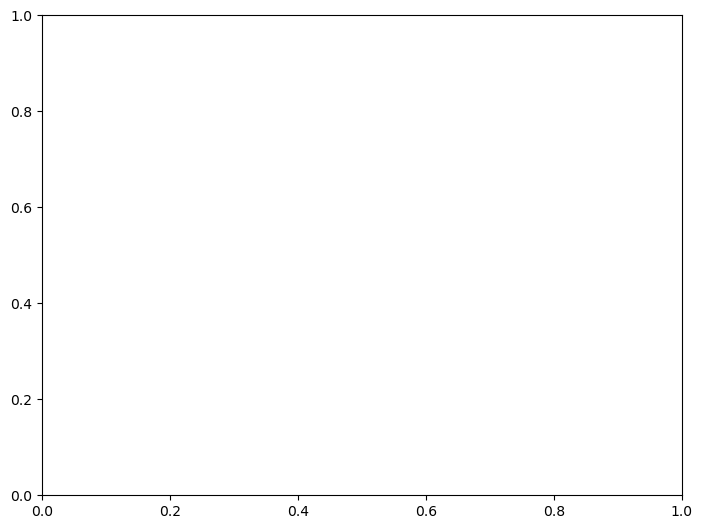

In [65]:
nx.draw(graph_hp)

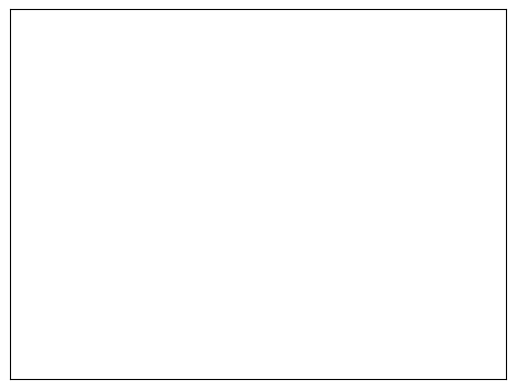

In [30]:
nx.draw_networkx(graph_hp)

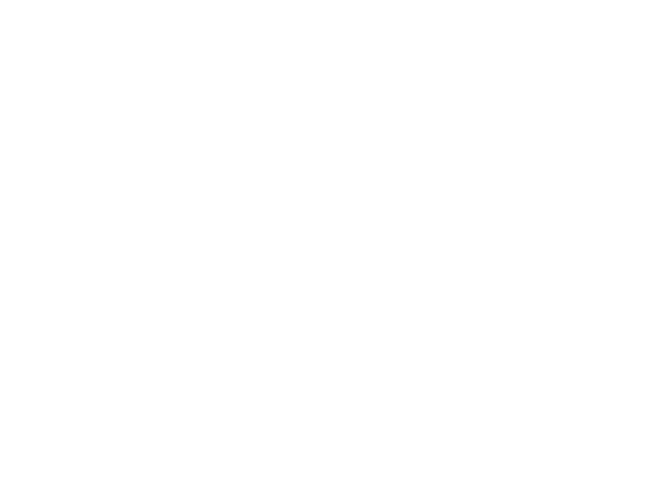

In [31]:
nx.draw_circular(graph_hp)

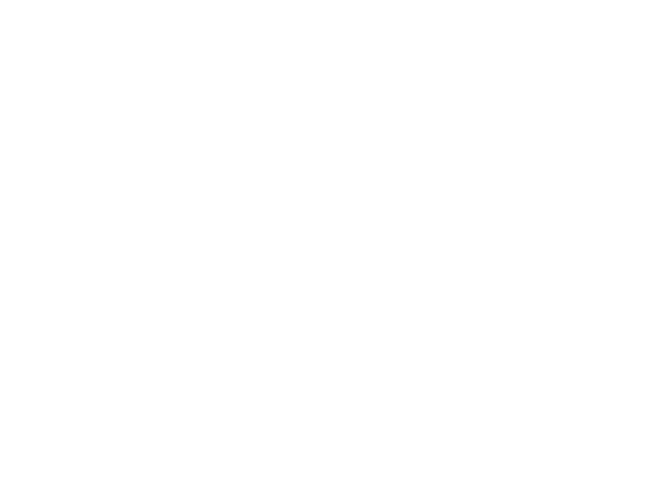

In [32]:
nx.draw_kamada_kawai(graph_hp)

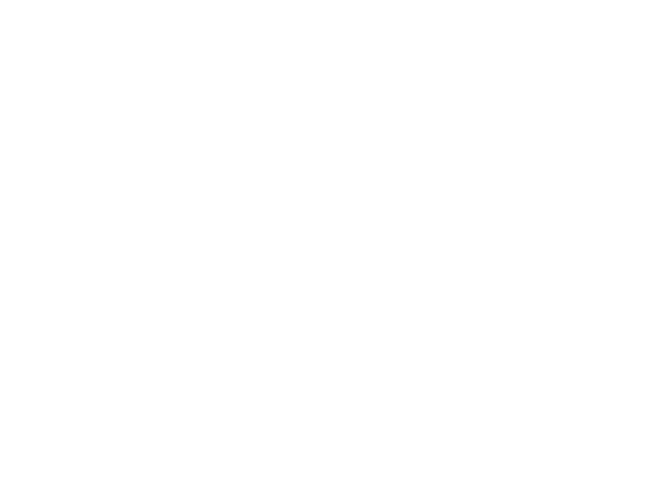

In [33]:
nx.draw_random(graph_hp)

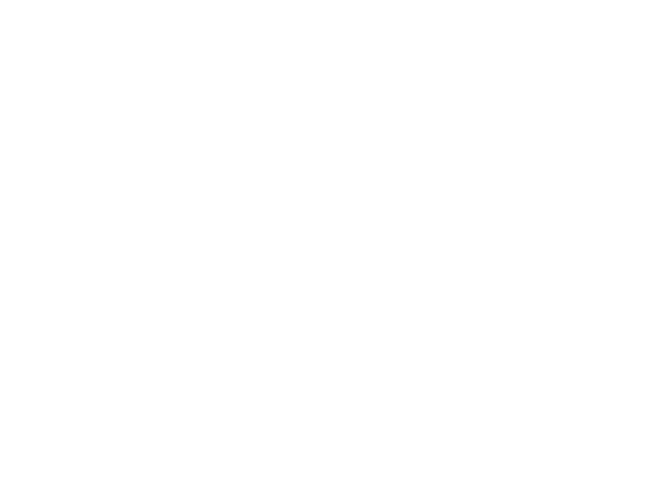

In [34]:
nx.draw_spring(graph_hp)

In [54]:
# interactive visualization
#net = Network(notebook=True)
#net.from_nx(G)
#net.show("example.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


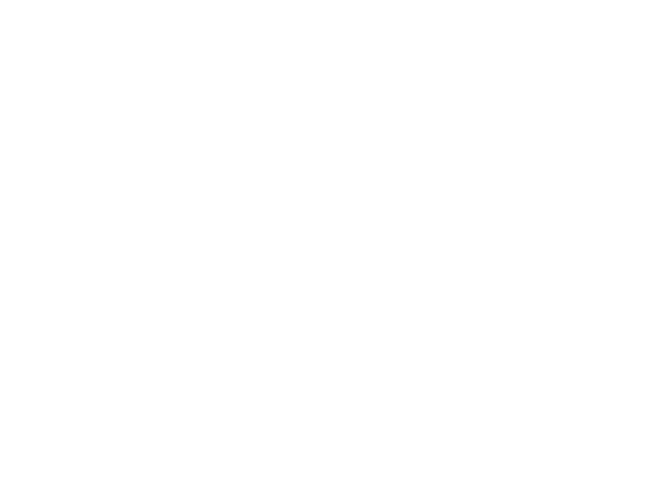

In [36]:
nx.draw(graph_hp,nx.spectral_layout(graph_hp))

In [68]:
nx.spectral_layout(G)

{'14th_century': array([-0.2236068,  1.       ]),
 'African_slave_trade': array([-0.2236068,  1.       ]),
 'Greece': array([-0.2236068,  1.       ]),
 'John_F._Kennedy': array([-0.2236068,  1.       ]),
 'Fire': array([-0.2236068,  1.       ]),
 'Rainbow': array([-0.2236068,  1.       ]),
 'Sodium': array([-0.2236068,  1.       ]),
 'Elizabeth_I_of_England': array([-0.2236068,  1.       ]),
 '2004_Atlantic_hurricane_season': array([-0.2236068, -0.2      ]),
 'Chromium': array([-0.2236068, -0.2      ]),
 'Atom': array([-0.2236068, -0.2      ]),
 'Ice_age': array([-0.2236068, -0.2      ]),
 '8th_century': array([-0.2236068, -0.2      ]),
 'Buckminster_Fuller': array([-0.2236068, -0.2      ]),
 'James_II_of_England': array([-0.2236068, -0.2      ]),
 '2005_Atlantic_hurricane_season': array([-0.2236068, -0.2      ]),
 'Spain': array([-0.2236068, -0.2      ]),
 'Jazz': array([-0.2236068, -0.2      ]),
 'Liechtenstein': array([-0.2236068, -0.2      ]),
 'Sweden': array([-0.2236068, -0.2    